In [1]:
import scanpy as sc

In [2]:
# Load PBMC 3k data
adata = sc.datasets.pbmc3k()
adata.raw = adata  # Save raw version

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 5.58M/5.58M [00:03<00:00, 1.54MB/s]


In [3]:
# Quick preprocessing
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\scanpy\preprocessing\_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [5]:
! pip3 install igraph

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   --------------- ------------------------ 0.8/2.0 MB 1.7 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/2.0 MB 1.7 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.0 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 2.0 MB/s eta 0:00:00


In [7]:
! pip3 install leidenalg

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------------------- ------------- 1.0/1.6 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 10.5 MB/s eta 0:00:00


C:\Users\HP\AppData\Local\Temp\ipykernel_15256\4213717504.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


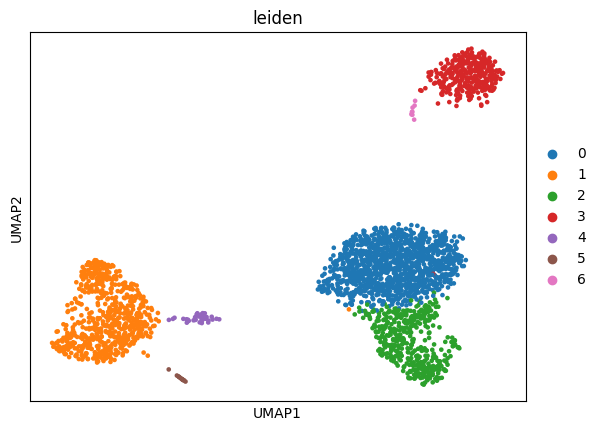

In [8]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

# Plot UMAP
sc.pl.umap(adata, color=['leiden'], save='_leiden_clusters.png')

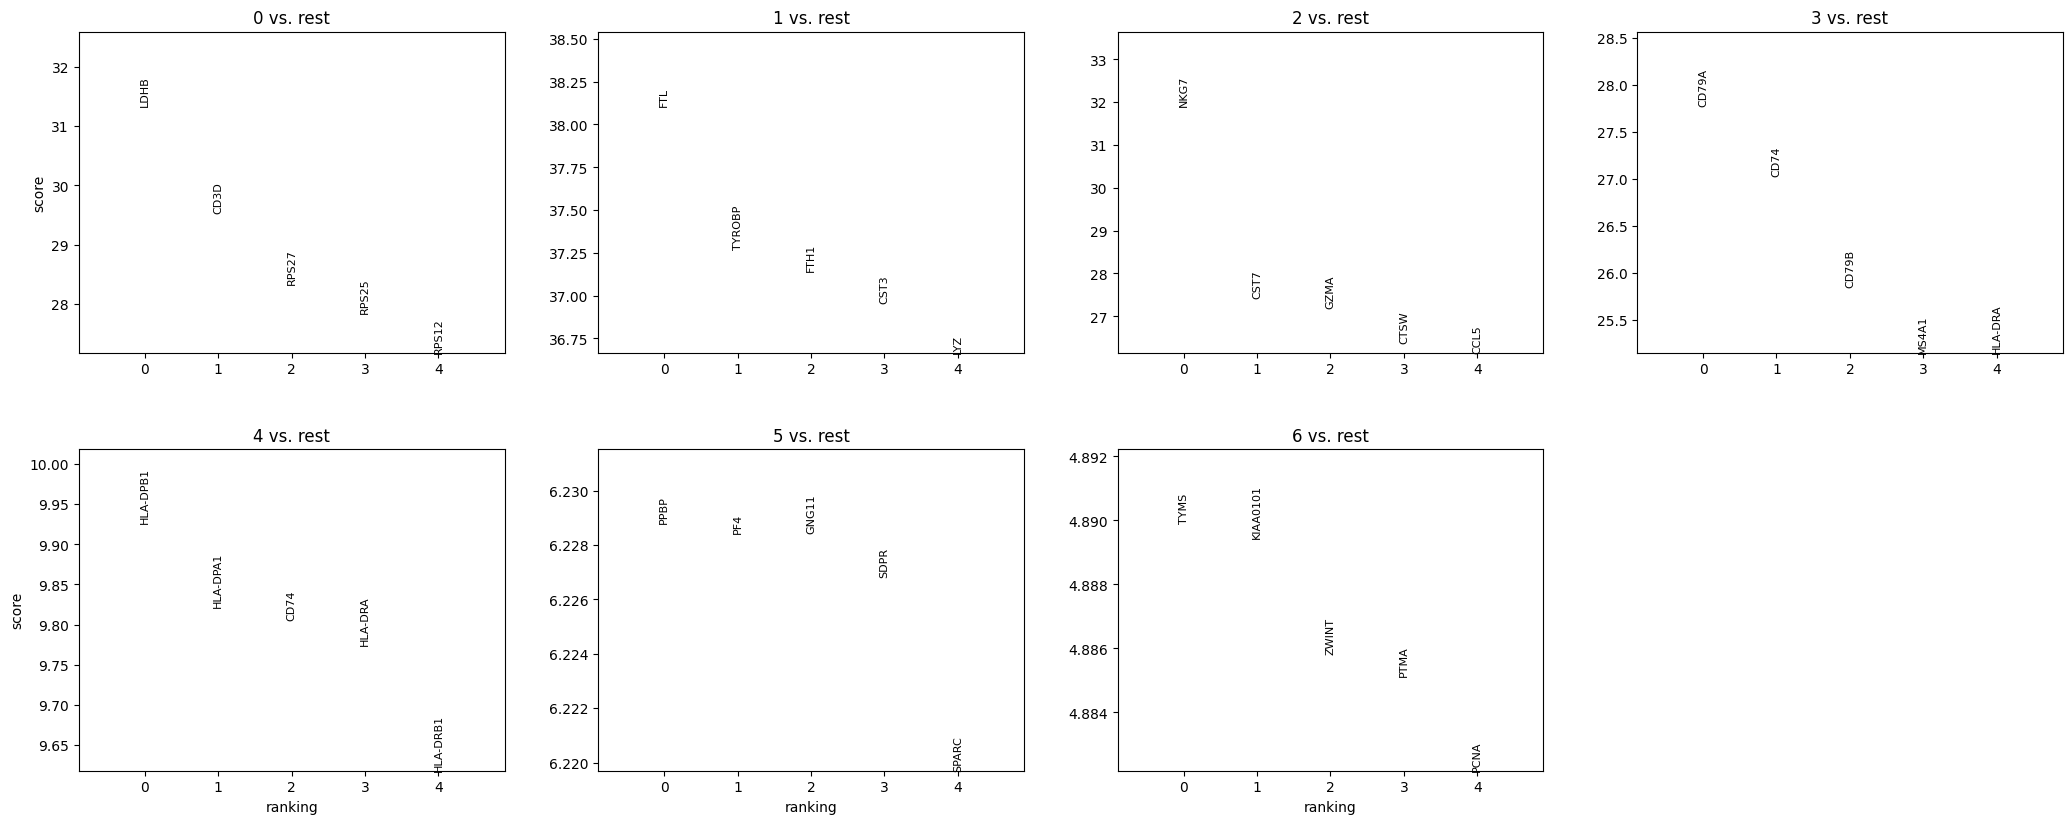

,marker_1,marker_2,marker_3,marker_4,marker_5
0,LDHB,CD3D,RPS27,RPS25,RPS12
1,FTL,TYROBP,FTH1,CST3,LYZ
2,NKG7,CST7,GZMA,CTSW,CCL5
3,CD79A,CD74,CD79B,MS4A1,HLA-DRA
4,HLA-DPB1,HLA-DPA1,CD74,HLA-DRA,HLA-DRB1
5,PPBP,PF4,GNG11,SDPR,SPARC
6,TYMS,KIAA0101,ZWINT,PTMA,PCNA


In [9]:
import pandas as pd

# Find marker genes using the Wilcoxon rank-sum test
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

# Plot top marker genes for a few clusters
sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False)

# Export top 5 marker genes per cluster to a dictionary
top_genes = {}
for cluster in adata.obs['leiden'].cat.categories:
    genes = adata.uns['rank_genes_groups']['names'][cluster][:5]
    top_genes[cluster] = list(genes)

# Convert to DataFrame for reference
top_genes_df = pd.DataFrame.from_dict(top_genes, orient='index')
top_genes_df.columns = [f"marker_{i+1}" for i in range(top_genes_df.shape[1])]
top_genes_df

Using Transformers

In [31]:
! pip install transformers accelerate

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/10.2 MB 9.6 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/10.2 MB 8.4 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/10.2 MB 5.9 MB/s eta 0:00:02
   --------------------- ------------------ 5.5/10.2 MB 7.0 MB/s eta 0:00:01
   ------------------------ --------------- 6.3/10.2 MB 7.4 MB/s eta 0:00:01
   ------------------------- -------------- 6.6/10.2 MB 5.7 MB/s eta 0:00:01
   --------------------------------- ------ 8.7/10.2 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 10.2/10.2 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ------------------------------ --------- 1.8/2.4 MB 11.2 MB/s eta 0:00:01
   ---------------------------------- ----- 2.1/2.4 MB 4.5 MB/s eta 0:00:01
   ----------

In [32]:
from transformers import pipeline

# Load FLAN-T5 model from Hugging Face (downloads ~1.2GB on first run)
generator = pipeline("text2text-generation", model="google/flan-t5-large")

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--google--flan-t5-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [39]:
def annotate_with_flan(marker_genes):
    prompt = f"""
You are an expert immunologist. Given the following list of marker genes from a single-cell RNA sequencing cluster:

{", ".join(marker_genes)}

What is the most likely **immune cell type** these genes represent (e.g., T cells, B cells, NK cells, dendritic cells, monocytes, etc)? 
Return only the cell type name, not gene names.
"""
    output = generator(prompt, max_length=100, do_sample=False)
    return output[0]['generated_text'].strip()


In [40]:
import pandas as pd

top_genes_df = pd.DataFrame({
    "marker_1": ["LDHB", "FTL", "NKG7", "CD79A", "HLA-DPB1", "PPBP", "TYMS"],
    "marker_2": ["CD3D", "TYROBP", "CST7", "CD74", "HLA-DPA1", "PF4", "KIAA0101"],
    "marker_3": ["RPS27", "FTH1", "GZMA", "CD79B", "CD74", "GNG11", "ZWINT"],
    "marker_4": ["RPS25", "CST3", "CTSW", "MS4A1", "HLA-DRA", "SDPR", "PTMA"],
    "marker_5": ["RPS12", "LYZ", "CCL5", "HLA-DRA", "HLA-DRB1", "SPARC", "PCNA"]
})

Loop over clusters and annotate

In [41]:
annotations = []

for index, row in top_genes_df.iterrows():
    marker_genes = row.tolist()
    cell_type = annotate_with_flan(marker_genes)
    annotations.append(cell_type)
    print(f"Cluster {index}: {cell_type}")

Cluster 0: NK cells
Cluster 1: B cells
Cluster 2: B cells
Cluster 3: B cells
Cluster 4: B cells
Cluster 5: B cells
Cluster 6: NK cells


Combine and view results

In [42]:
top_genes_df["LLM_annotation"] = annotations
top_genes_df

,marker_1,marker_2,marker_3,marker_4,marker_5,LLM_annotation
0,LDHB,CD3D,RPS27,RPS25,RPS12,NK cells
1,FTL,TYROBP,FTH1,CST3,LYZ,B cells
2,NKG7,CST7,GZMA,CTSW,CCL5,B cells
3,CD79A,CD74,CD79B,MS4A1,HLA-DRA,B cells
4,HLA-DPB1,HLA-DPA1,CD74,HLA-DRA,HLA-DRB1,B cells
5,PPBP,PF4,GNG11,SDPR,SPARC,B cells
6,TYMS,KIAA0101,ZWINT,PTMA,PCNA,NK cells


Mapping LLM labels back into adata.obs:

In [43]:
# Create a mapping: cluster number → LLM annotation
cluster_labels = top_genes_df["LLM_annotation"].tolist()
cluster_map = {str(i): label for i, label in enumerate(cluster_labels)}

# Add annotated labels to adata.obs
adata.obs["llm_annotation"] = adata.obs["leiden"].map(cluster_map)

Plot the UMAP with LLM labels

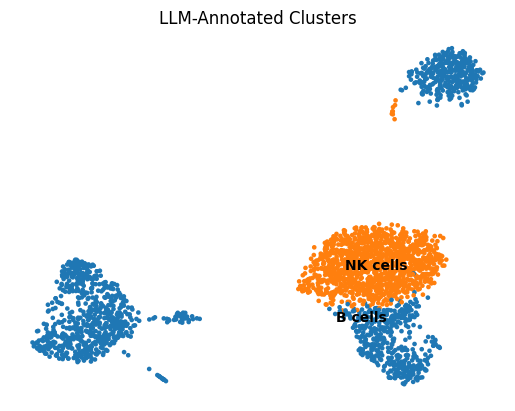

In [44]:
import scanpy as sc

sc.pl.umap(adata, color="llm_annotation", legend_loc='on data', title="LLM-Annotated Clusters", frameon=False)